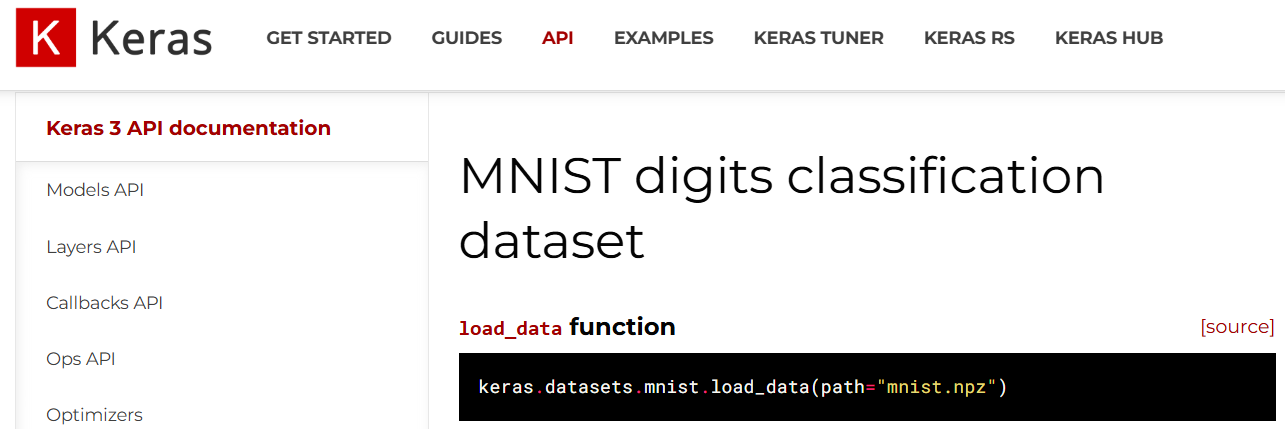

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

### Build neural network

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

### Compilation stage

In [10]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Data preprocessing

In [11]:
train_images = train_images.reshape((60_000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10_000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Model training

In [12]:
model.fit(x=train_images, y=train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8685 - loss: 0.4475
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9645 - loss: 0.1230
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9783 - loss: 0.0751
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9849 - loss: 0.0511
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9896 - loss: 0.0356


### Predict some test numbers

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(x=test_digits)
predictions[0]  # First digit prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([8.7321934e-07, 2.6860685e-09, 3.4329958e-05, 8.4009371e-05,
       1.1742518e-12, 3.1101063e-08, 5.6967118e-12, 9.9988008e-01,
       2.2437263e-08, 5.5862631e-07], dtype=float32)

In [15]:
test_labels[0]

7

In [17]:
predictions[0].argmax()

7

### Model evaluation with metrics

In [19]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print(f'test_acc: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9727 - loss: 0.0935
test_acc: 0.9763


In [22]:
print(f'test_loss: {test_loss:.4f}')

test_loss: 0.0791


### Tensors

In [23]:
import numpy as np

In [24]:
x = np.array(5212025)  # Scalar
x

array(5212025)

In [25]:
x.ndim

0